In [70]:
import tarfile
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/acerml/raw/main/fgo_icon.tar"
urlretrieve(url, "fgo.tar")
tar = tarfile.TarFile("fgo.tar")
tar.extractall()

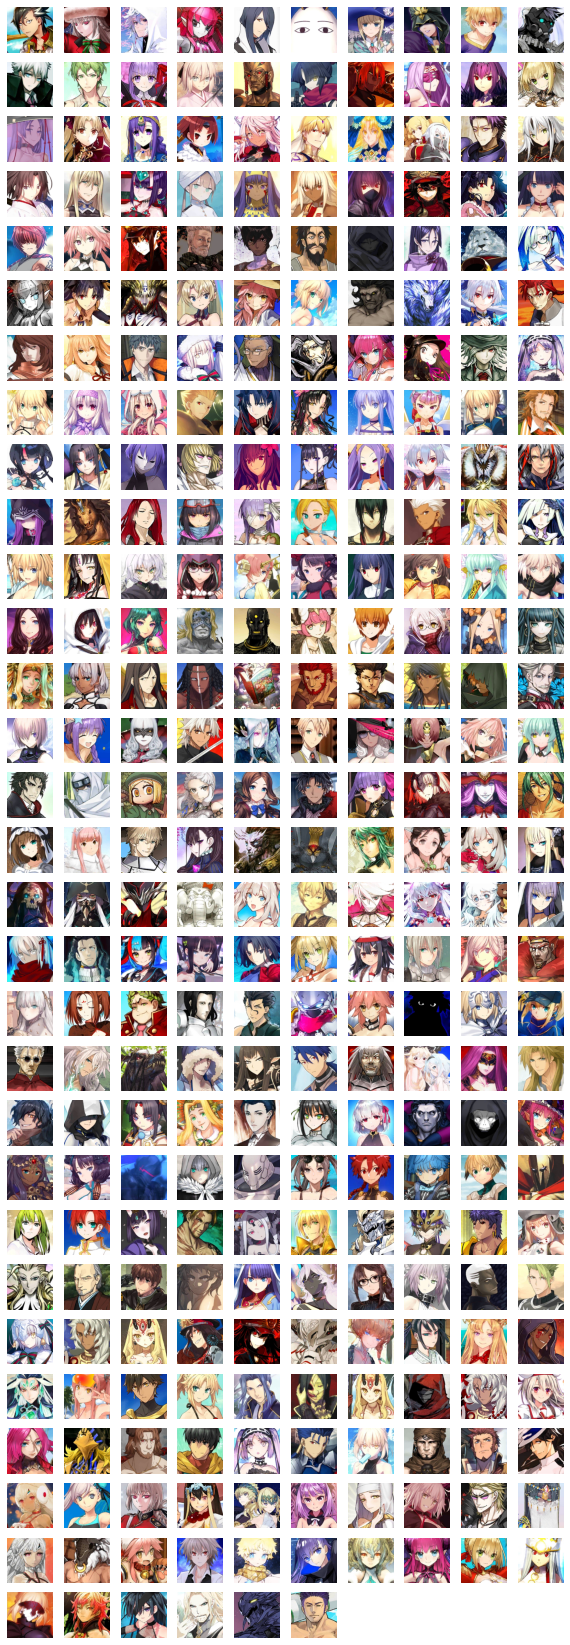

In [71]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
pics = []
for fn in glob.glob("fgo_icon/*.png"):
    img = np.array(Image.open(fn).convert("RGB"))
    pics.append(img)
pics = np.array(pics)

plt.figure(figsize=(10, 30))
width = 10
height = len(pics) // width + 1
for i, img in enumerate(pics):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    plt.imshow(img)

In [72]:
import pandas as pd
print("before reshape:", pics.shape)
pics_reshape = pics.reshape(pics.shape[0], -1)
print("after reshape:", pics_reshape.shape)
pd.DataFrame(pics_reshape)

before reshape: (296, 128, 128, 3)
after reshape: (296, 49152)


0      1      2      3      4      ...  49147  49148  49149  49150  49151
0      253    253    253    245    253  ...    180    172    245    228    220
1       60      0      0     60      0  ...     33     50    172     15     32
2       84    118    186     84    118  ...    255    255    255    255    255
3      154    121    121    154    121  ...     52     52     81     64     64
4      255    255    255    255    255  ...    234    234    234    234    234
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
291    101     68     59    101     68  ...    223    181    247    223    181
292     38    128    161     38    128  ...    236    219    253    236    219
293    253    253    253    253    253  ...    200    200    217    200    200
294    112     79    112    112     79  ...     18     35     24     24     41
295    195    246    246    195    246  ...    145    112    186    145    112

[296 rows x 49152 columns]

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pics_pca = pca.fit_transform(pics_reshape)
print("每個軸variance:", pca.explained_variance_ratio_)
print("加總:", sum(pca.explained_variance_ratio_))

每個軸variance: [0.23059968 0.06445426 0.05616374 0.03415942 0.02942252 0.02490515
 0.02040986 0.0178937  0.01650301 0.01295639 0.01255184 0.01057273
 0.01024367 0.00974501 0.0092513  0.00847322 0.00835151 0.00819328
 0.00763252 0.0071319 ]
加總: 0.5996147364510575


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

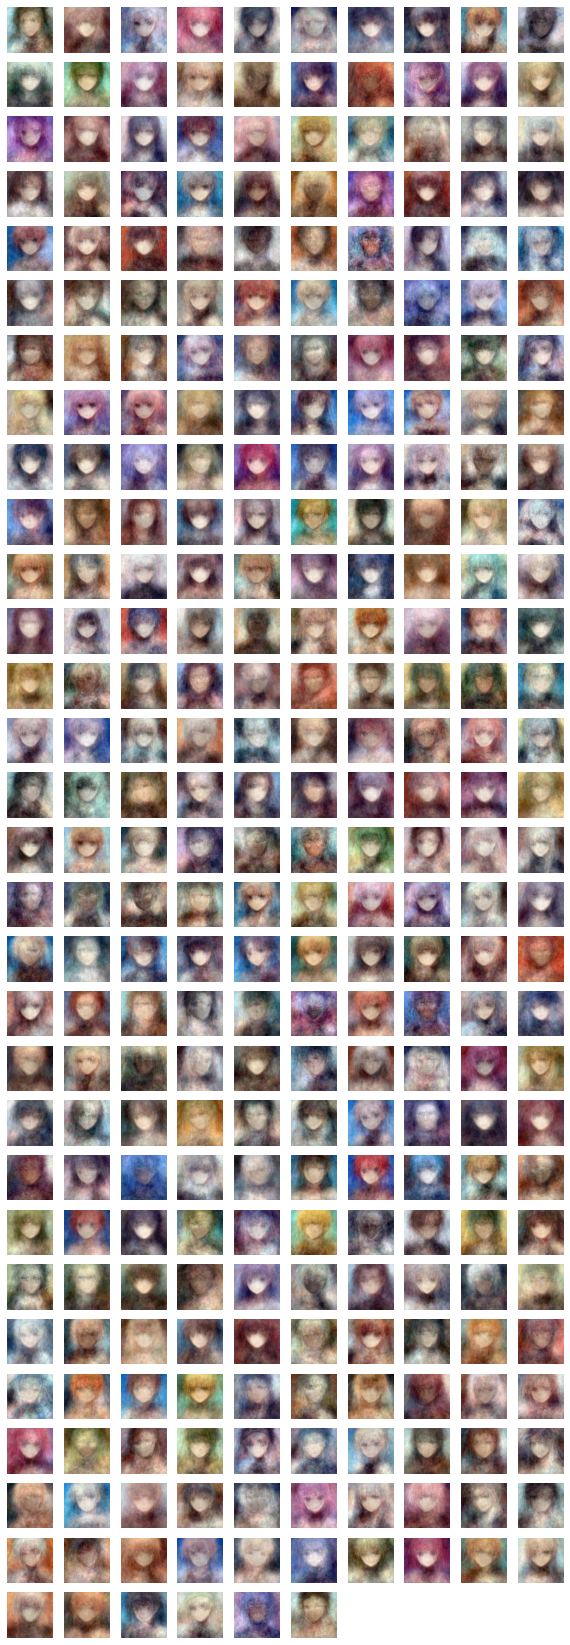

In [82]:
from sklearn.preprocessing import minmax_scale

pics_pca_inv = pca.inverse_transform(pics_pca)
pics_pca_inv = minmax_scale(pics_pca_inv, axis=1)
pics_pca_inv_re = pics_pca_inv.reshape(pics.shape)
plt.figure(figsize=(10, 30))
width = 10
height = len(pics) // width + 1
for i, img in enumerate(pics_pca_inv_re):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


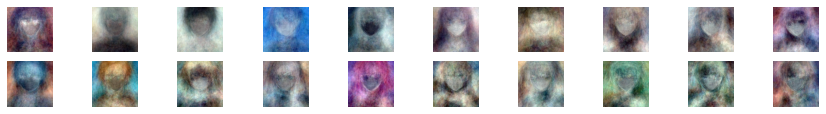

In [83]:
component_re = minmax_scale(pca.components_, axis=1)
component_re = component_re.reshape(pca.components_.shape[0], 128, 128, 3)
plt.figure(figsize=(15, 30))
width = 10
height = len(pics) // width + 1
for i, img in enumerate(component_re):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    plt.imshow(img)

In [84]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
x_test_tsne = tsne.fit_transform(pics_pca)
scaler = MinMaxScaler()
x_test_tsne_scale = scaler.fit_transform(x_test_tsne)

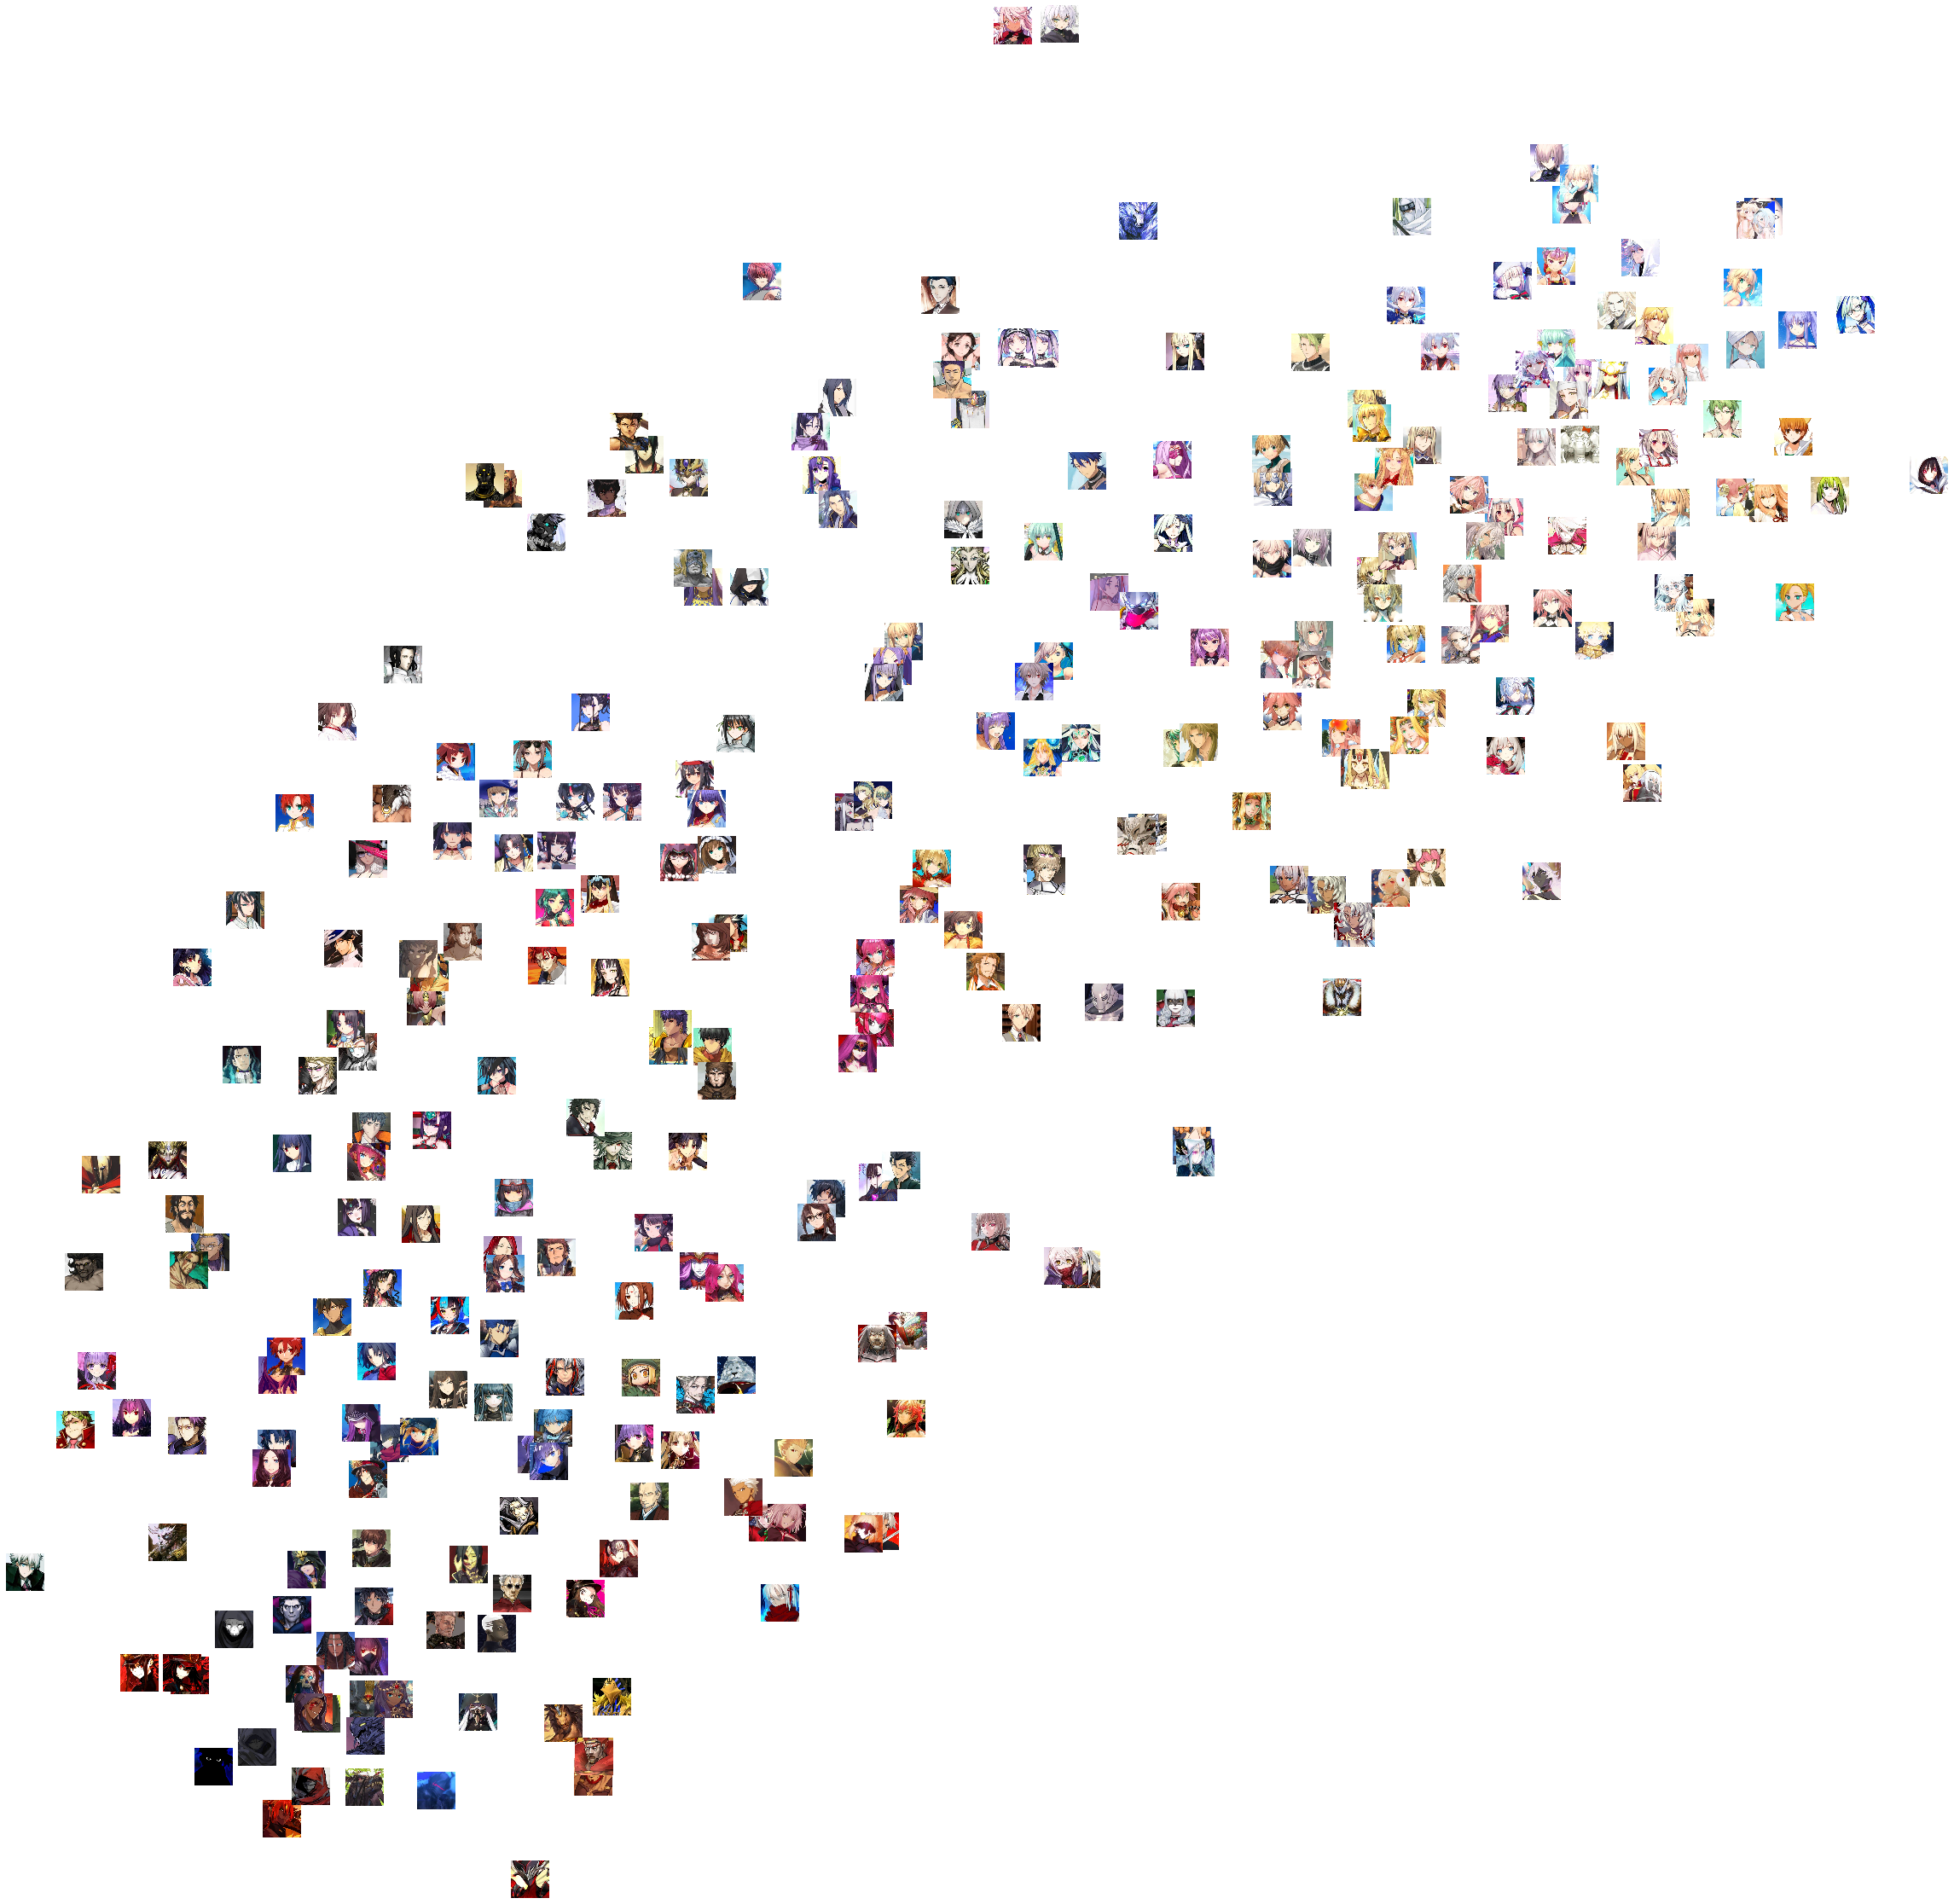

In [94]:
from matplotlib import pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

# Create figure
fig = plt.figure(figsize=(40, 40))
ax = plt.subplot(1, 1, 1)
plt.axis("off")
xs = x_test_tsne_scale[:, 0]
ys = x_test_tsne_scale[:, 1]

for x, y, p in zip(xs, ys, pics):
    bb = Bbox.from_bounds(x, y, 0.02,0.02)  
    bb2 = TransformedBbox(bb, ax.transData)
    bbox_image = BboxImage(bb2, norm= None, origin=None, clip_on=False)
    bbox_image.set_data(p)
    ax.add_artist(bbox_image)